# level 1 Task 1:Data Exploration and Preprocessing

*Explore the dataset and identify  the number
of rows and columns

*Check for missing values in each column and
handle them accordingly.

*Perform data type conversion if necessary.
Analyze the distribution of the target variable ("Aggregate rating") and identify any class
imbalances.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
df= pd.read_csv("C:\\Users\\JCT\\Desktop\\cognify technologies\\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 9551
Number of Columns 21


In [12]:
print("missing values in each column:")
print(df.isnull().sum())

missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [13]:
print("Total number of missing values accross all columns:",df.isnull().sum().sum())

Total number of missing values accross all columns: 9


In [15]:
for column in df.columns[df.isnull().any()]:
    print(f"Column '[{column}]' has {df[column].isnull().sum()} missing values")

Column '[Cuisines]' has 9 missing values


<function matplotlib.pyplot.show(close=None, block=None)>

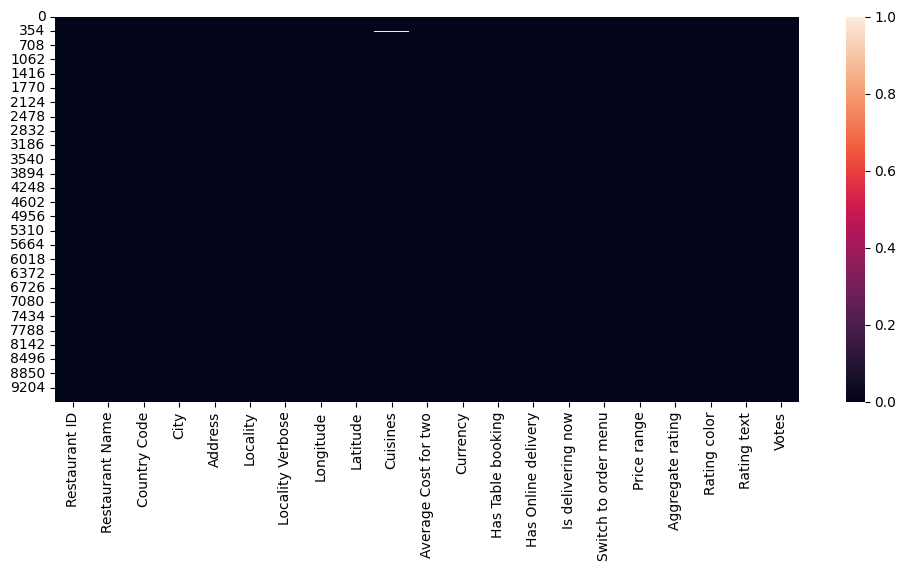

In [16]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull())
plt.show

In [17]:
print("Data types of 'Cuisines' column:", df ['Cuisines'].dtypes)


Data types of 'Cuisines' column: object


In [18]:
df['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [19]:
df['Cuisines'].value_counts()

Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64

In [20]:
# Missing values filled by mode
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


In [21]:
print("Missing values in 'Cuisines' column after handling:")
print(df['Cuisines'].isnull().sum())


Missing values in 'Cuisines' column after handling:
0


In [22]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [23]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


<Figure size 1500x400 with 0 Axes>

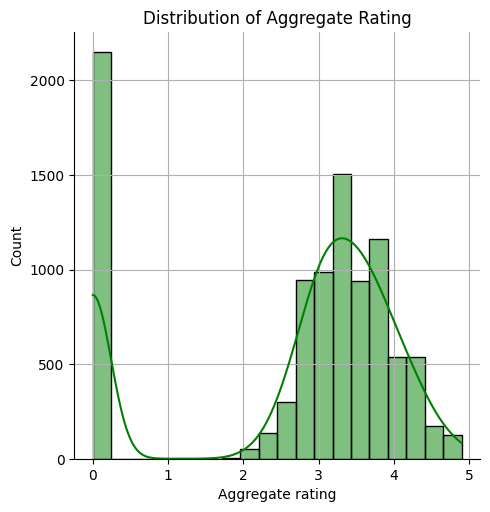

In [24]:
plt.figure(figsize=(15,4))
sns.displot(df['Aggregate rating'], bins=20, color='green', kde=True)
plt.title('Distribution of Aggregate Rating')
plt.grid(True)
plt.show()

In [25]:
print("Summary statistics of Aggregate rating:")
print(df['Aggregate rating'].describe())

Summary statistics of Aggregate rating:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64
